# EDA- Sports

**Done By- Saptarsi Bhattacharjee**

**Aim:**
1. Find out most sucessful teams, players and
2. factors contributing win or loss of a team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
match=pd.read_csv("/work/matches.csv")
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
match.shape

(756, 18)

In [5]:
deli=pd.read_csv("/work/deliveries.csv")
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deli.shape

(179078, 21)

In [7]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## Basic Analysis:

In [8]:
print(f'Total Matches played: {match.shape[0]}')

Total Matches played: 756


In [9]:
print(f'ALL TEAMS: {match["team1"].unique()}')

ALL TEAMS: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [10]:
a=match['id'].max()
print("Number of total matches : ",a)

Number of total matches :  11415


In [11]:
print(f'Highest Man of the Matches: {match["player_of_match"].value_counts().idxmax()}')

Highest Man of the Matches: CH Gayle


In [12]:
print(f'Total times CH Gayle is man of the match: {match["player_of_match"].value_counts().max()}')

Total times CH Gayle is man of the match: 21


In [13]:
print(f' Team with most wins: {match["winner"].value_counts().idxmax()}')

 Team with most wins: Mumbai Indians


**Team wins by most runs**

In [14]:
df=match.iloc[match["win_by_runs"].idxmax()]
df[["season","team1","team2","winner","win_by_runs"]]

season                     2017
team1            Mumbai Indians
team2          Delhi Daredevils
winner           Mumbai Indians
win_by_runs                 146
Name: 43, dtype: object

**team win by most wicket**

In [15]:
df=match.iloc[match["win_by_wickets"].idxmax()]
df[["season","team1","team2","winner","win_by_wickets"]]

# Or to show only the team name- 
# match.iloc[match["win_by_wickets"].idxmax()]["winner"]

season                             2017
team1                     Gujarat Lions
team2             Kolkata Knight Riders
winner            Kolkata Knight Riders
win_by_wickets                       10
Name: 2, dtype: object

# Data Visualization:

**Season in which most number of matches are played**

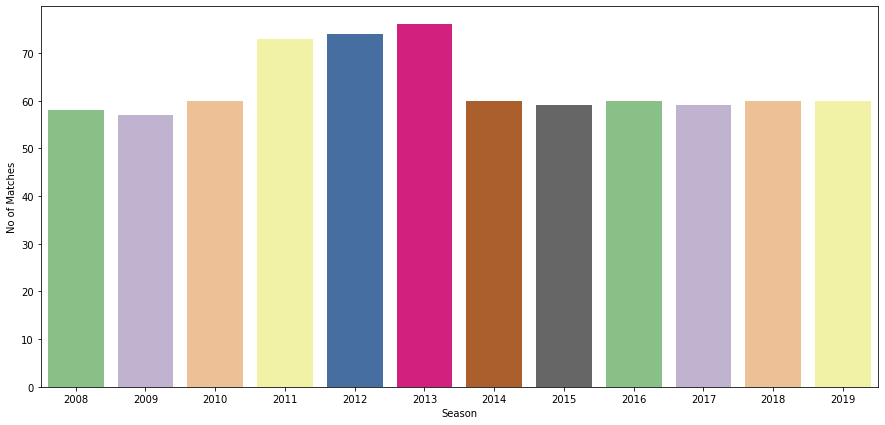

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x="season", data=match, palette="Accent")
plt.xlabel("Season")
plt.ylabel("No of Matches")

plt.show()

**Cities where most matches are occured**

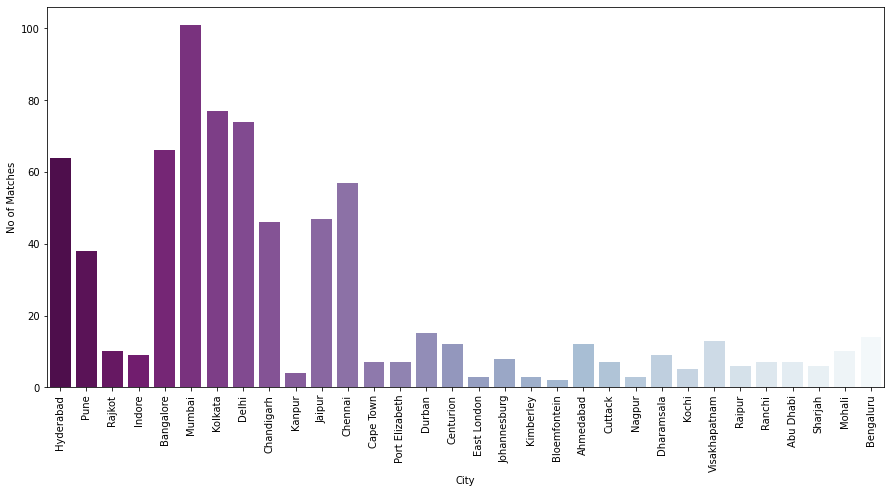

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x="city", data=match, palette="BuPu_r")
plt.xlabel("City")
plt.ylabel("No of Matches")
plt.xticks(rotation=90)
plt.show()

**Toss Decision- Bat/Ball**

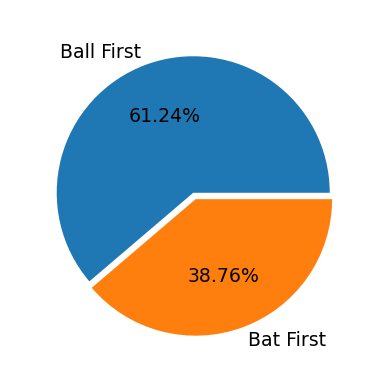

In [18]:
category_name=["Ball First","Bat First"]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2), dpi=226)   #dpi=display pixel per inch
plt.pie(match["toss_decision"].value_counts(),labels=category_name,textprops={"fontsize":6},autopct="%1.2f%%", explode=[0,0.05])
# autopct = format for % label
# explode =distance of pie slice

plt.show()

**Toss Decision across Seasons**

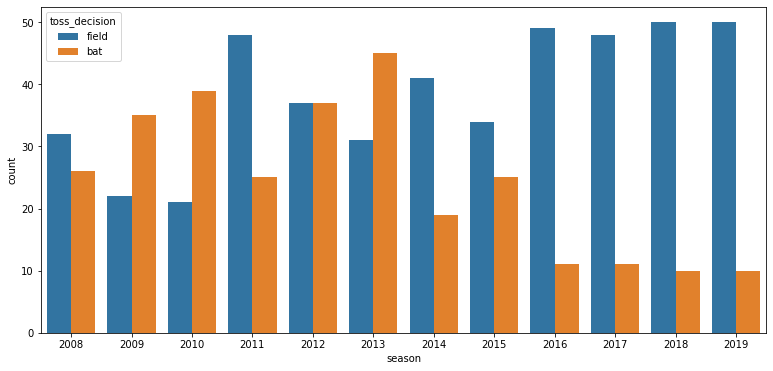

In [19]:
plt.subplots(figsize=(13,6))
sns.countplot(x="season",hue="toss_decision",data=match)
plt.show()

**Do the teams win the matches after winning toss**

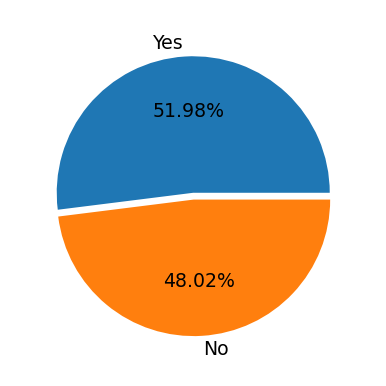

In [20]:
winner= [match['toss_winner']==match['winner']]
total_times_toss_winner_won_match = sum(winner[0][:])
total_times_toss_winner_not_won_match = len(winner[0]) - total_times_toss_winner_won_match

categories=["Yes","No"]
sizes = [total_times_toss_winner_won_match, total_times_toss_winner_not_won_match]

plt.figure(figsize=(2,2), dpi=226)   
plt.pie(sizes,labels=categories,textprops={"fontsize":6},autopct="%1.2f%%", explode=[0,0.05])

plt.show()


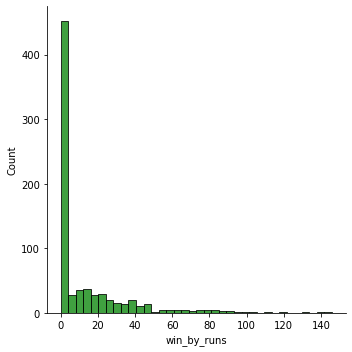

In [21]:
sns.displot(match["win_by_runs"],color="green")
plt.show()

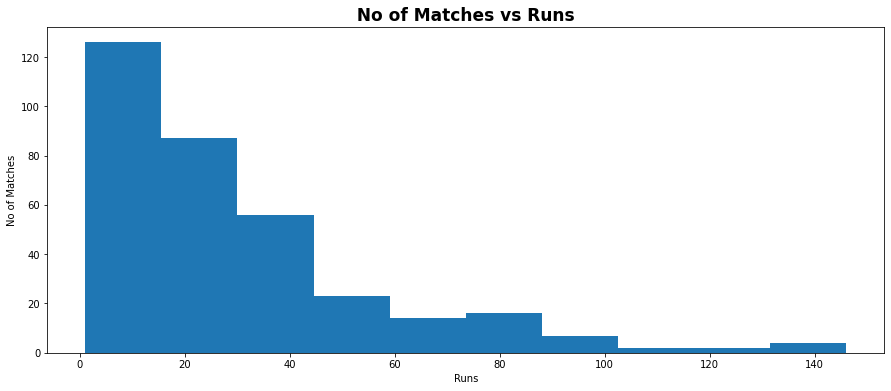

In [22]:
# Extracting the records whre a team won batting first

batting_fst=match[match["win_by_runs"]!=0]

# Match wins by runs 

plt.figure(figsize=(15,6))
plt.hist(batting_fst["win_by_runs"])
plt.title(" No of Matches vs Runs ",fontsize=17, fontweight="bold")
plt.xlabel("Runs")
plt.ylabel("No of Matches")
plt.show()

**Frequency of wins w.r.t number of wickets**

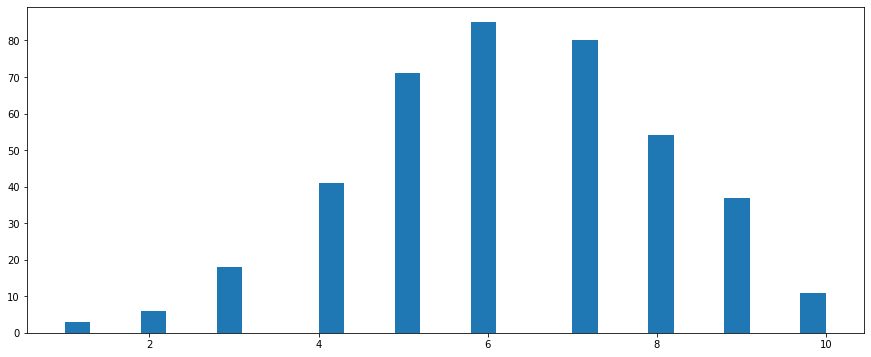

In [23]:
# Extracting the records whre a team won 2nd batting 
batting_2nd=match[match["win_by_wickets"]!=0]


plt.figure(figsize=(15,6))
plt.hist(batting_2nd["win_by_wickets"],bins=30)
plt.show()

**Number of Marches won by the teams**

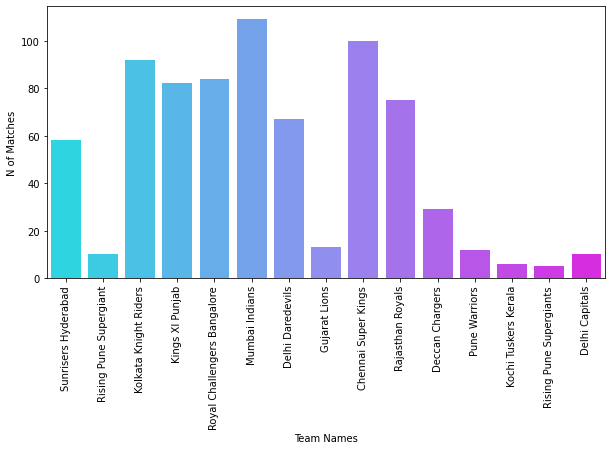

In [24]:
plt.figure(figsize=(10,5))

sns.countplot(x='winner', data=match, palette='cool')

plt.xlabel('Team Names')
plt.ylabel('N of Matches')
plt.xticks(rotation=90)

plt.show()

**Sixes and fours across the season**

In [25]:
# Merging matches and deliveries dataset by referencing the id and match_id columns

df_runs =match[['id', 'season']].merge(deli, left_on='id', right_on='match_id',
                                               how='left').drop('id', axis=1)

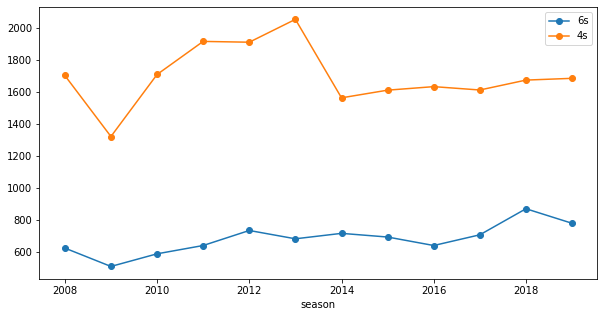

In [26]:
boundaries = df_runs.groupby('season')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
fours = df_runs.groupby('season')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()

boundaries = boundaries.merge(fours, left_on='season', right_on='season', how='left')
boundaries = boundaries.rename(columns={'batsman_runs_x': '6s', 'batsman_runs_y': '4s'})
boundaries.set_index('season')[['6s','4s']].plot(marker='o')

plt.gcf().set_size_inches(10,5)
plt.show()

**Runs across the season**

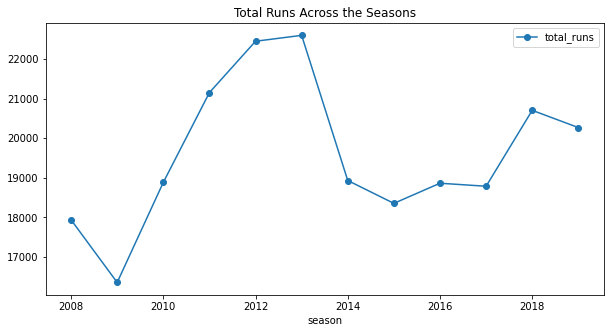

In [27]:
# Group df by seasons and then sum total_runs for every group

season = df_runs.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')

plt.gcf().set_size_inches(10,5)
plt.title('Total Runs Across the Seasons')
plt.show()

**

Lets see the outliers.

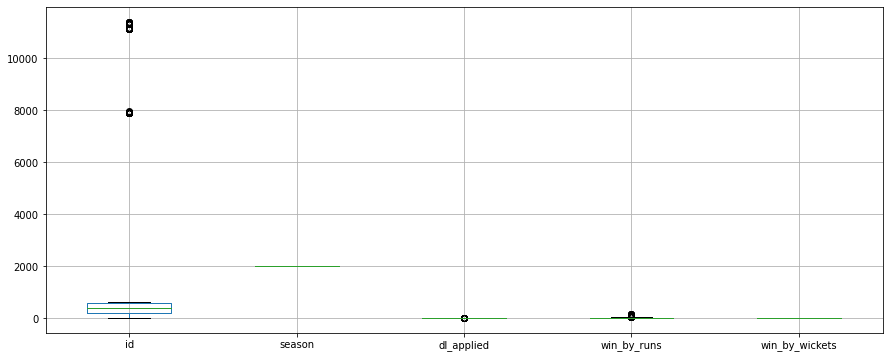

In [28]:
plt.figure(figsize=(15,6))
match.boxplot()
plt.show()

**Teams1 and total winning match**

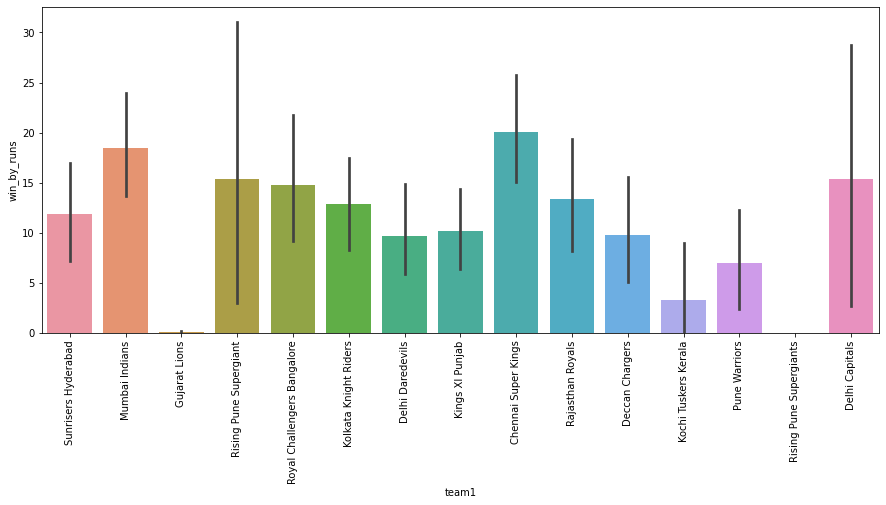

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x="team1",y="win_by_runs", data=match)
plt.xticks(rotation=90)
plt.show()

**Matches Per Team**

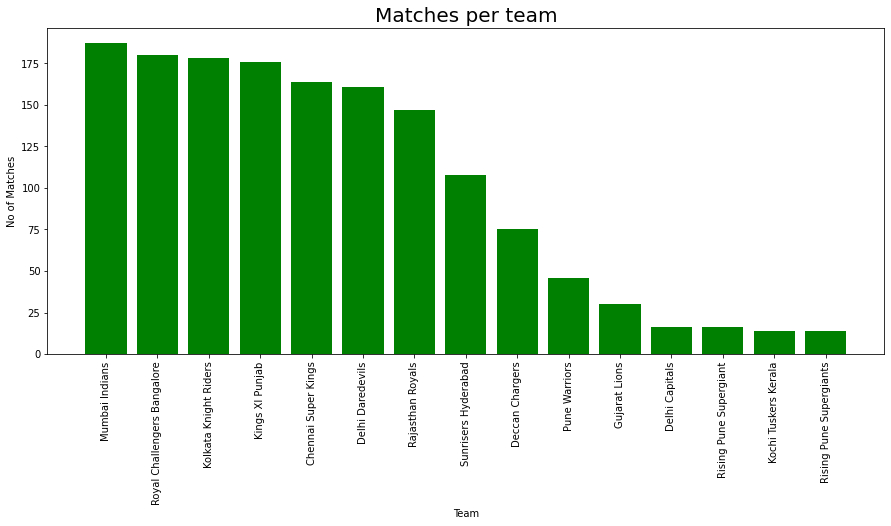

In [30]:
no_match=pd.concat([match["team1"], match["team2"]])
no_match=no_match.value_counts()

plt.figure(figsize=(15,6))
plt.bar(x=no_match.index,height=no_match.values, color="green")
plt.title("Matches per team",fontsize=20)
plt.xlabel("Team")
plt.ylabel("No of Matches")
plt.xticks(rotation=90)
plt.show()

**Season Winners**

In [31]:
for i in range(2008,2019):
    df_winners=((match[match['season']==i]).iloc[-1])
    print(df_winners[[1,10]].values)

[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']
[2017 'Mumbai Indians']
[2018 'Chennai Super Kings']


**Team that wins most seasons**

In [32]:
season_win=match.drop_duplicates("season",keep="last")
seasonw= season_win[["season","winner"]]
seasonw.sort_values("season", inplace=True)
seasonw.reset_index(inplace=True, drop=True)

<ipython-input-32-e16552793dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonw.sort_values("season", inplace=True)


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


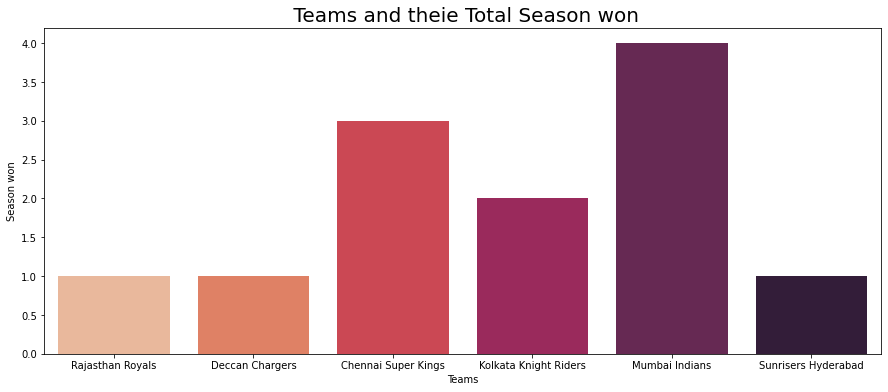

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot("winner",data=seasonw, palette="rocket_r")
plt.title(" Teams and theie Total Season won",fontsize=20)
plt.xlabel("Teams")
plt.ylabel("Season won")
plt.show()

**Batsman with most runs**

In [34]:
top_scores =deli.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top_scores = top_scores.iloc[:10,:]

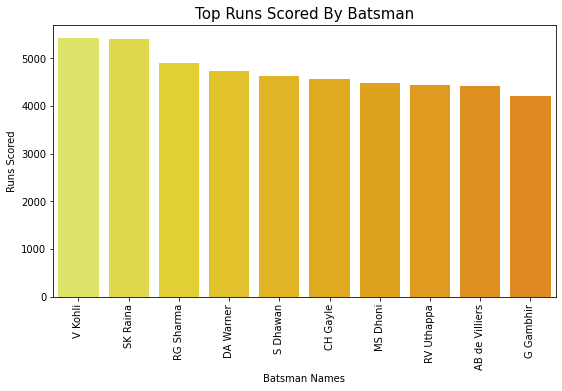

In [35]:
plt.figure(figsize=(9,5))

sns.barplot(x=top_scores['batsman'], y=top_scores['batsman_runs'], palette='Wistia')

plt.title('Top Runs Scored By Batsman', fontsize=15)
plt.xlabel('Batsman Names')
plt.ylabel('Runs Scored')
plt.xticks(rotation=90)

plt.show()

**Batsman with most sixes**

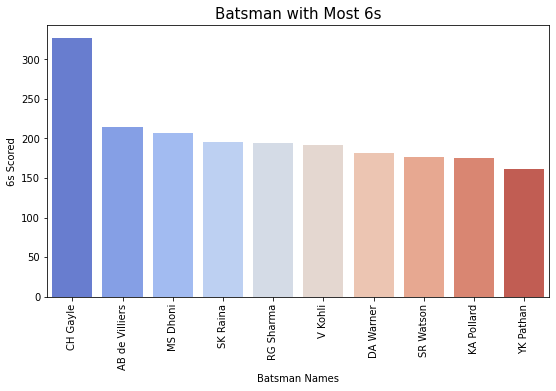

In [36]:
most_sixes =deli.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
most_sixes = most_sixes.sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
most_sixes = most_sixes.iloc[:10,:]

plt.figure(figsize=(9,5))
sns.barplot(x=most_sixes['batsman'], y=most_sixes['batsman_runs'], palette='coolwarm')

plt.title('Batsman with Most 6s', fontsize=15)
plt.xlabel('Batsman Names')
plt.ylabel('6s Scored')
plt.xticks(rotation=90)

plt.show()

**Bowler with most wickets**

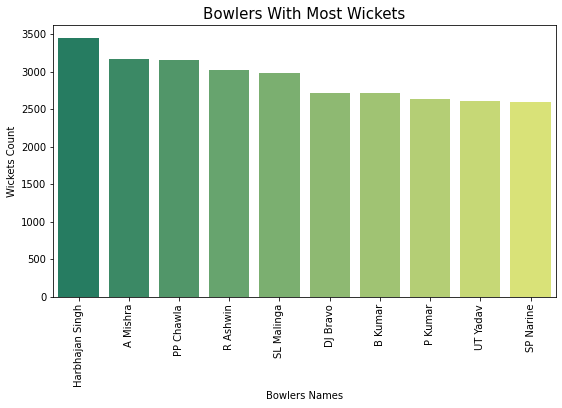

In [37]:
wickets= deli.groupby("bowler")["ball"].agg("count").reset_index()
wickets=wickets.sort_values(by="ball", ascending=False).reset_index(drop=True)
wickets =wickets.iloc[:10,:]

plt.figure(figsize=(9,5))

sns.barplot(x=wickets['bowler'], y=wickets['ball'], palette='summer')

plt.title('Bowlers With Most Wickets', fontsize=15)
plt.xlabel('Bowlers Names')
plt.ylabel('Wickets Count')
plt.xticks(rotation=90)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e65b0e7-77de-49a3-af94-cd1eea604e8f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>